<h1 align = "center"> "Predicting Success of Bank Telemarketing using Machine Learning Techniques" <h1>
<hr>

<p  style="text-align:justify">
Data science, machine learning and analytics are growing at an astronomical rate because the humongous amounts of the data that is being generated by the companies, and the companies  are now looking for professionals who can sift through the goldmine of data and help them drive swift business decisions efficiently. By examining large amounts of data, it is possible to uncover hidden patterns and trends. <br>
    
__Marketing Introduction:__
*The process by which companies create value for customers and build strong customer relationships in order to capture value from customers in return.*<br>
**Marketing campaigns** are characterized by  focusing on the customer needs and their overall satisfaction. Nevertheless, there are different variables that determine whether a marketing campaign will be successful or not. There are certain variables that we need to take into consideration when making a marketing campaign. <br>

### Problem Statement
<p  style="text-align:justify">
The Portuguese Bank had run a telemarketing campaign in the past, making sales calls for a term-deposit product.The marketing team wants to launch another campaign, and they want to learn from the past one.<br>

__The aim of the project__ is to make use of machine learning techniques to build an effective predictive-analytical model which can forecast, whether a client is likely to subscribe to a long term (fixed) deposit account with the bank or not.i.e Whether a prospect had bought the product or not is mentioned in the column named 'response'

### Data Exploration
<p  style="text-align:justify">
In this project,The dataset comes from the UCI Machine Learning repository, The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The dataset can be downloaded from here <br>
    https://archive.ics.uci.edu/ml/datasets/Bank+Marketing  <br> 
It provides assessment (data) of a bank’s marketing division, to sell long-term (fixed) deposits to clients based on their socio-economic indicators, like their marital status, type of job, age,.... etc. as given below.

## Attributes Description: <br>
__Input variables:__ <br>
### i. Bank client data:<br>
<a id="bank_client_data"></a>
1 - **age:** (numeric)<br>
2 - **job:** type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - **marital:** marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - **education:** (categorical: primary, secondary, tertiary and unknown)<br>
5 - **default:** has credit in default? (categorical: 'no','yes','unknown')<br>
6 - **housing:** has housing loan? (categorical: 'no','yes','unknown')<br>
7 - **loan:** has personal loan? (categorical: 'no','yes','unknown')<br>
8 - **balance:** Balance of the individual.
### ii. Related with the last contact of the current campaign:
<a id="last_contact"></a>
8 - **contact:** contact communication type (categorical: 'cellular','telephone') <br>
9 - **month:** last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - **day:** last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - **duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>
### iii. other attributes:<br>
<a id="other_attributes"></a>
12 - **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - **pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - **previous:** number of contacts performed before this campaign and for this client (numeric)<br>
15 - **poutcome:** outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>

__Output variable__ (desired target):<br>
21 - **y** - has the client subscribed a term deposit? (binary: 'yes','no')

<h3>Loading Data</h3>
<p  style="text-align:justify">
    We will first import the pandas package and then load the data using the <b>read_csv()</b> method of pandas.

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.plotting import scatter_matrix

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data = pd.read_csv("E:/DS Projects/0001 Projects/01.BANKING PROJECTs/02/Project data set/bank-additional-full.csv", sep = ";")

Lets take a lok at our dataset using __df.head()__ method, which which display the first five rows of our dataset.

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


__Convert dataframe to list of dicts__

In [4]:
data_dict = data.T.to_dict().values()

__vectorise features such that text based classifications are transformed one hot encoded features__

In [5]:
vec = DictVectorizer()
signal_array = vec.fit_transform(data_dict).toarray()
feature_names = vec.get_feature_names()
# signal_array = data.as_matrix() #spits out a numpy matrix
# feature_names = list(data)

In [6]:
df = pd.DataFrame(signal_array,columns=feature_names)
data = data.dropna()
print(df.shape)
df.sample(5)

(41188, 65)


,age,campaign,cons.conf.idx,cons.price.idx,contact=cellular,contact=telephone,day_of_week=fri,day_of_week=mon,day_of_week=thu,day_of_week=tue,...,month=oct,month=sep,nr.employed,pdays,poutcome=failure,poutcome=nonexistent,poutcome=success,previous,y=no,y=yes
38743,28.0,3.0,-30.1,92.649,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5017.5,999.0,0.0,1.0,0.0,0.0,0.0,1.0
12607,59.0,2.0,-42.7,93.918,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5228.1,999.0,0.0,1.0,0.0,0.0,1.0,0.0
11256,36.0,1.0,-41.8,94.465,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,5228.1,999.0,0.0,1.0,0.0,0.0,1.0,0.0
17368,38.0,5.0,-42.7,93.918,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5228.1,999.0,0.0,1.0,0.0,0.0,1.0,0.0
7859,49.0,5.0,-41.8,94.465,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5228.1,999.0,0.0,1.0,0.0,0.0,1.0,0.0


__The dataset provides the bank customers’ information. It includes 41,188 records and 21 fields.__

In [7]:
print(list(data.columns))

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [8]:
df.describe()

,age,campaign,cons.conf.idx,cons.price.idx,contact=cellular,contact=telephone,day_of_week=fri,day_of_week=mon,day_of_week=thu,day_of_week=tue,...,month=oct,month=sep,nr.employed,pdays,poutcome=failure,poutcome=nonexistent,poutcome=success,previous,y=no,y=yes
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,-40.502600,93.575664,0.634748,0.365252,0.190031,0.206711,0.209357,0.196416,...,0.017432,0.013839,5167.035911,962.475454,0.103234,0.863431,0.033335,0.172963,0.887346,0.112654
std,10.42125,2.770014,4.628198,0.578840,0.481507,0.481507,0.392330,0.404951,0.406855,0.397292,...,0.130877,0.116824,72.251528,186.910907,0.304268,0.343396,0.179512,0.494901,0.316173,0.316173
min,17.00000,1.000000,-50.800000,92.201000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,4963.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,-42.700000,93.075000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5099.100000,999.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,38.00000,2.000000,-41.800000,93.749000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5191.000000,999.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,47.00000,3.000000,-36.400000,93.994000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5228.100000,999.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,98.00000,56.000000,-26.900000,94.767000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5228.100000,999.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000


Fortunately, there are no <b>missing values</b>. If there were missing values we will have to fill them with the median, mean or mode. I tend to use the median but in this scenario there is no need to fill any missing values. This will definitely make our job easier!

In [9]:
# No missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 65 columns):
age                              41188 non-null float64
campaign                         41188 non-null float64
cons.conf.idx                    41188 non-null float64
cons.price.idx                   41188 non-null float64
contact=cellular                 41188 non-null float64
contact=telephone                41188 non-null float64
day_of_week=fri                  41188 non-null float64
day_of_week=mon                  41188 non-null float64
day_of_week=thu                  41188 non-null float64
day_of_week=tue                  41188 non-null float64
day_of_week=wed                  41188 non-null float64
default=no                       41188 non-null float64
default=unknown                  41188 non-null float64
default=yes                      41188 non-null float64
duration                         41188 non-null float64
education=basic.4y               41188 non-null flo

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

X = signal_array[:,:-2]
X = np.hstack((X[:,:14],X[:,15:]))
y = signal_array[:,-1]

# Build a forest and compute the feature importances
forest = RandomForestClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Feature ranking:
1. feature age (0.164047)
2. feature emp.var.rate (0.117021)
3. feature campaign (0.083560)
4. feature month=sep (0.049478)
5. feature nr.employed (0.034052)
6. feature cons.conf.idx (0.027570)
7. feature cons.price.idx (0.023012)
8. feature poutcome=nonexistent (0.022943)
9. feature education=unknown (0.022474)
10. feature euribor3m (0.021194)
11. feature housing=unknown (0.021185)
12. feature housing=yes (0.017653)
13. feature marital=divorced (0.016720)
14. feature education=basic.9y (0.016283)
15. feature education=professional.course (0.016191)
16. feature marital=married (0.014782)
17. feature day_of_week=mon (0.014618)
18. feature day_of_week=wed (0.014473)
19. feature poutcome=success (0.014427)
20. feature day_of_week=thu (0.014243)
21. feature day_of_week=tue (0.014166)
22. feature job=student (0.014008)
23. feature job=unknown (0.014003)
24. feature loan=unknown (0.013831)
25. feature day_of_week=fri (0.013753)
26. feature education=illiterate (0.011851)
27.

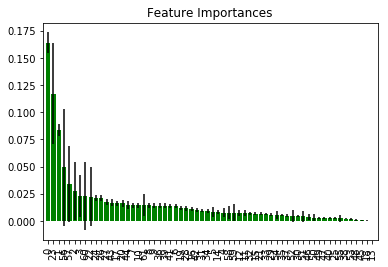

In [11]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature Importances", fontsize=12, ha='center')
plt.bar(range(X.shape[1]), importances[indices],color='green', yerr=std[indices], align="center",)
plt.rc("font", size=5)
plt.xticks(range(X.shape[1]), indices,rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

__Draw seaborn regplot for Age with order 3__

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


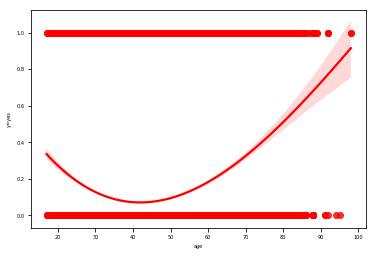

In [12]:
ax = sns.regplot(x="age", y="y=yes", order=3, color='r',data=df, truncate=True)

__Draw seaborn Countplot for Job Distribution__

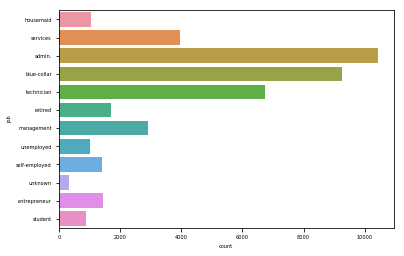

In [13]:
sns.countplot(y="job", data=data)
plt.show()

__Draw seaborn regplot for Campaign__

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


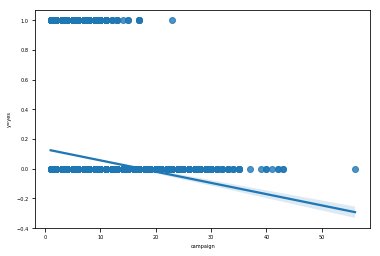

In [14]:
ax = sns.regplot(x="campaign", y="y=yes", order=1, data=df, truncate=True)

__Primarly from above graph Shows that In any campaign,Calling any customer after 15 times is useless. Hence no customer must be approached more than 15 times.__

In [15]:
df.loc[(df['campaign'] >15) & (df['y=yes']==1)]

,age,campaign,cons.conf.idx,cons.price.idx,contact=cellular,contact=telephone,day_of_week=fri,day_of_week=mon,day_of_week=thu,day_of_week=tue,...,month=oct,month=sep,nr.employed,pdays,poutcome=failure,poutcome=nonexistent,poutcome=success,previous,y=no,y=yes
3219,39.0,23.0,-36.4,93.994,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,0.0,1.0
10162,44.0,17.0,-41.8,94.465,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,5228.1,999.0,0.0,1.0,0.0,0.0,0.0,1.0
17284,59.0,17.0,-42.7,93.918,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,5228.1,999.0,0.0,1.0,0.0,0.0,0.0,1.0
17655,50.0,17.0,-42.7,93.918,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5228.1,999.0,0.0,1.0,0.0,0.0,0.0,1.0
29980,31.0,17.0,-47.1,93.075,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,5099.1,999.0,0.0,1.0,0.0,0.0,0.0,1.0


__Draw seaborn regplot for Employment Variation Rate__

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


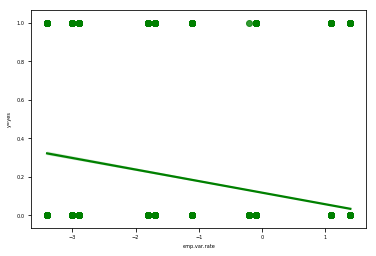

In [16]:
ax = sns.regplot(x="emp.var.rate", y="y=yes", order=1, color='green',data=df, truncate=True)

__Draw seaborn regplot for nr.employed: number of employees__

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


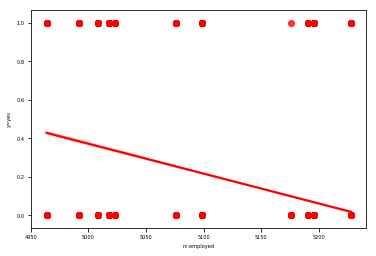

In [17]:
ax = sns.regplot(x="nr.employed", y="y=yes", order=1,color='r',data=df, truncate=True)

__Draw seaborn regplot for Age with order 1__

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


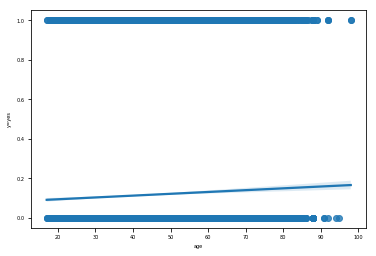

In [18]:
ax = sns.regplot(x="age", y="y=yes", order=1, data=df, truncate=True)


__Draw seaborn regplot for duration: last contact duration__

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


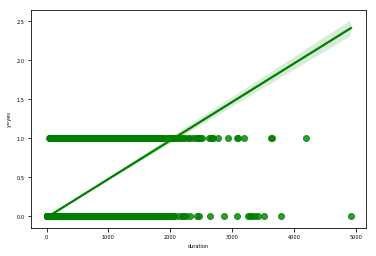

In [19]:
ax = sns.regplot(x="duration", y="y=yes", order=1, color='green',data=df, truncate=True)

__Draw seaborn regplot for contact: “telephone”__  <br>
__contact: contact communication type (categorical: “cellular”, “telephone”)__

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


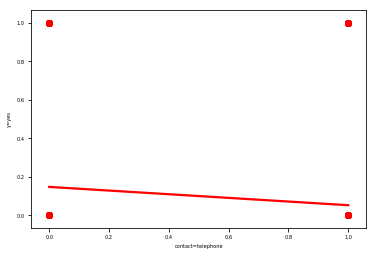

In [20]:
ax = sns.regplot(x="contact=telephone", y="y=yes", order=1,color='r', data=df, truncate=True)

__Draw seaborn Countplot for Month__
__month: last contact month of year__

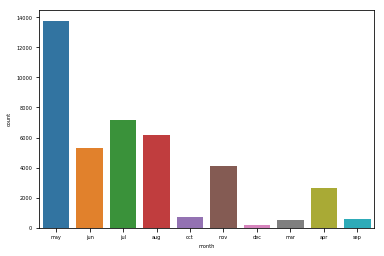

In [21]:
sns.countplot(x="month", data=data)
plt.show()

__Draw seaborn regplot for Month: “September & December”__ <br>
__month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)__

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


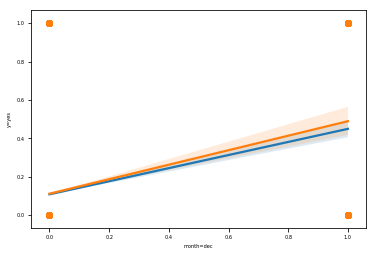

In [22]:
ax = sns.regplot(x="month=sep", y="y=yes", order=1, data=df, truncate=True)
ax = sns.regplot(x="month=dec", y="y=yes", order=1, data=df, truncate=True)

__Draw seaborn regplot for consumer confidence index__ <br>
__cons.conf.idx: consumer confidence index - monthly indicator (numeric)__ 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


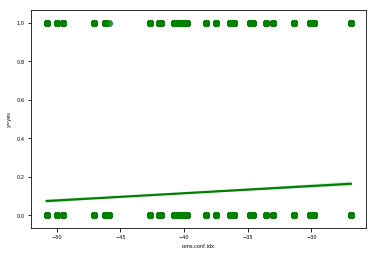

In [23]:
ax = sns.regplot(x="cons.conf.idx", y="y=yes", order=1,color='green', data=df, truncate=True)

__Draw seaborn regplot for poutcome: outcome of the previous marketing campaign__ <br>
__poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')__

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


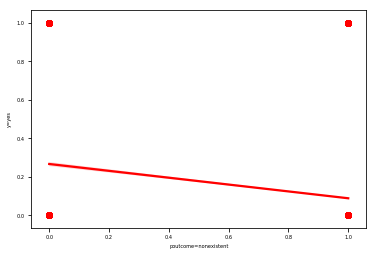

In [24]:
ax = sns.regplot(x="poutcome=nonexistent", y="y=yes", order=1,color='r', data=df, truncate=True)

__Barplot for previous marketing campaign outcome__

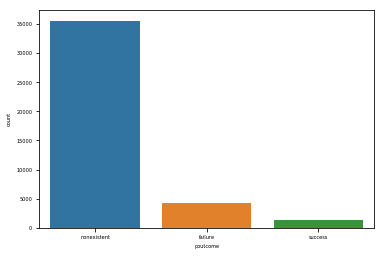

In [25]:
sns.countplot(x="poutcome", data=data)
plt.show()

__Draw seaborn regplot for education__ <br>
__education (categorical:'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')__

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


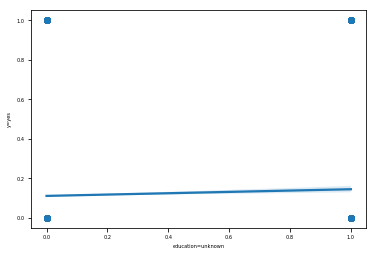

In [26]:
ax = sns.regplot(x="education=unknown", y="y=yes", order=1, data=df, truncate=True)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


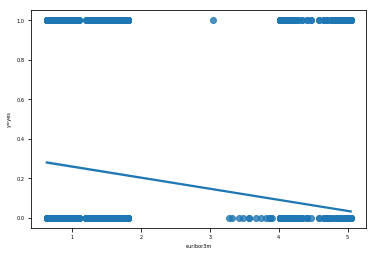

In [27]:
ax = sns.regplot(x="euribor3m", y="y=yes", order=1, data=df, truncate=True)

__Draw seaborn regplot for Housing__ <br>
__housing: has housing loan? (categorical: 'no','yes','unknown')__

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


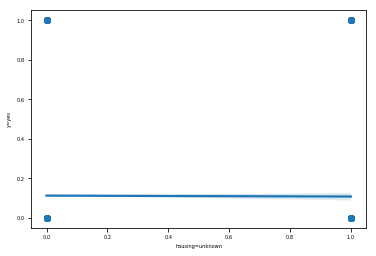

In [28]:
ax = sns.regplot(x="housing=unknown", y="y=yes", order=1, data=df, truncate=True)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


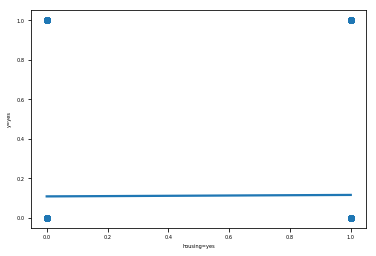

In [29]:
ax = sns.regplot(x="housing=yes", y="y=yes", order=1, data=df, truncate=True)

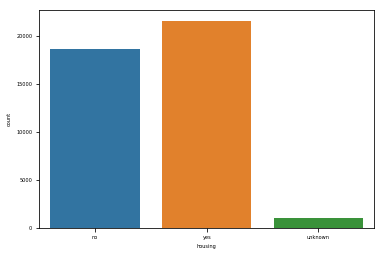

In [30]:
sns.countplot(x="housing", data=data)
plt.show()

## Let's optimize the results using new campaign

In [31]:
# Total Conversion ratio
sum(df['y=yes'])/sum(df['campaign'])

0.043875408967982296

In [32]:
# Now let's see efficiancy on every additional call
print ("Nth Call \t Efficiency")
for i in range(1,30):
    goo = sum(df.loc[df['campaign']==i]['y=yes']) / float(df.loc[df['campaign'] >= i].shape[0])
    print (str((i))+" \t\t "+str(goo))

Nth Call 	 Efficiency
1 		 0.05584150723511702
2 		 0.05143124097511254
3 		 0.04423551171393342
4 		 0.03261296660117878
5 		 0.024077046548956663
6 		 0.022156573116691284
7 		 0.015793848711554447
8 		 0.009566685424873381
9 		 0.012345679012345678
10 		 0.010968921389396709
11 		 0.01380897583429229
12 		 0.004335260115606936
13 		 0.007054673721340388
14 		 0.002105263157894737
15 		 0.0049261083743842365
16 		 0.0
17 		 0.013157894736842105
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.008620689655172414
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


#### The Market acceptable conversion ratio is 2-10% so it is a fair to say any call after the 6th call is not acceptable since it has a conversion ratio of less than 1.6%

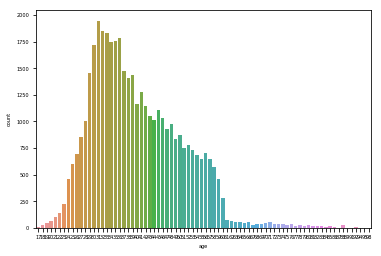

In [50]:
sns.countplot(x="age", data=data)
plt.show()

## Now Let's evaluate how much we can optimize on age.

#### Let's divide age into 10 year brackets


In [33]:
print("For age upto 30")

print ("Nth Call \t Efficiency")
for i in range(1,30):
    num = float(df[(df['age'] <= 30) & (df['campaign']==i) & (df['y=yes']==1)].shape[0])
    den = 1+float(df[(df['age'] <= 30) & (df['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))


For age upto 30
Nth Call 	 Efficiency
1 		 0.07502708559046588
2 		 0.07100309745055992
3 		 0.06274509803921569
4 		 0.04447739065974796
5 		 0.03882352941176471
6 		 0.02058319039451115
7 		 0.030805687203791468
8 		 0.006493506493506494
9 		 0.012875536480686695
10 		 0.005376344086021506
11 		 0.013888888888888888
12 		 0.0
13 		 0.010869565217391304
14 		 0.0
15 		 0.014705882352941176
16 		 0.0
17 		 0.0
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.0
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [34]:
print("For age between 30-40")
print ("Nth Call \t Efficiency")
for i in range(1,30):
    num = float(df[(df['age'] <= 40) & (df['age'] > 30) & (df['campaign']==i) & (df['y=yes']==1)].shape[0])
    den = 1+float(df[(df['age'] <= 40) & (df['age'] > 30) & (df['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))
    

For age between 30-40
Nth Call 	 Efficiency
1 		 0.04882216526302942
2 		 0.042643923240938165
3 		 0.04005444293214078
4 		 0.028093645484949834
5 		 0.02048131080389145
6 		 0.024279210925644917
7 		 0.007494646680942184
8 		 0.008746355685131196
9 		 0.011538461538461539
10 		 0.011990407673860911
11 		 0.015015015015015015
12 		 0.0076045627376425855
13 		 0.009523809523809525
14 		 0.0
15 		 0.0
16 		 0.0
17 		 0.009259259259259259
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.02040816326530612
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [35]:
print("For age between 40-50")
print ("Nth Call \t Efficiency")
for i in range(1,30):
    num = float(df[(df['age'] <= 50) & (df['age'] > 40) & (df['campaign']==i) & (df['y=yes']==1)].shape[0])
    den = 1+float(df[(df['age'] <= 50) & (df['age'] > 40) & (df['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))

For age between 40-50
Nth Call 	 Efficiency
1 		 0.03925397910360316
2 		 0.036345108695652176
3 		 0.03047676523838262
4 		 0.027820710973724884
5 		 0.020737327188940093
6 		 0.016853932584269662
7 		 0.008012820512820512
8 		 0.008368200836820083
9 		 0.005333333333333333
10 		 0.013888888888888888
11 		 0.017316017316017316
12 		 0.005434782608695652
13 		 0.006622516556291391
14 		 0.007936507936507936
15 		 0.0
16 		 0.0
17 		 0.023529411764705882
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.0
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [36]:
print("For age between 50-60")
print ("Nth Call \t Efficiency")
for i in range(1,30):
    num = float(df[(df['age'] <= 60) & (df['age'] > 50) & (df['campaign']==i) & (df['y=yes']==1)].shape[0])
    den = 1+float(df[(df['age'] <= 60) & (df['age'] > 50) & (df['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))

For age between 50-60
Nth Call 	 Efficiency
1 		 0.050709615691277306
2 		 0.05120481927710843
3 		 0.040806293018682396
4 		 0.024681528662420384
5 		 0.016766467065868262
6 		 0.02120141342756184
7 		 0.022004889975550123
8 		 0.013559322033898305
9 		 0.024489795918367346
10 		 0.009900990099009901
11 		 0.0
12 		 0.0
13 		 0.0
14 		 0.0
15 		 0.011363636363636364
16 		 0.0
17 		 0.016129032258064516
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.0
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [37]:
print("For age above 60")
print ("Nth Call \t Efficiency")
for i in range(1,30):
    num = float(df[(df['age'] > 60) & (df['campaign']==i) & (df['y=yes']==1)].shape[0])
    den = float(df[(df['age'] > 60) & (df['campaign'] >= i)].shape[0])+1
    print (str((i))+" \t\t "+str(num/den))

For age above 60
Nth Call 	 Efficiency
1 		 0.24807903402854006
2 		 0.25806451612903225
3 		 0.20512820512820512
4 		 0.19230769230769232
5 		 0.12244897959183673
6 		 0.12121212121212122
7 		 0.18181818181818182
8 		 0.06666666666666667
9 		 0.0
10 		 0.0
11 		 0.16666666666666666
12 		 0.0
13 		 0.0
14 		 0.0
15 		 0.0
16 		 0.0
17 		 0.0
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.0
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


No extra ordinary patterns visible in age groups compared to the numbers over all ages

__Calculate the No of Total_calls to be made in Campaign__

In [38]:
# Calculate how many calls were made as a total_calls in Campaign 
total_calls = sum(df['campaign'])
print(total_calls)

105754.0


__Calculate the Extra_calls made after the 6th Call in the Campaign__

In [39]:
# Calculate how many calls were made after the 6th call
extra_calls = sum(df[df['campaign']>6]['campaign']) - 6*df[df['campaign']>6].shape[0]
print(extra_calls)

12040.0


__Calculate the reduction in the marketing Cost through the  Campaign__

In [40]:
# Calculate reduction in marketing cost
reduction=100*extra_calls/total_calls
print(reduction )

11.384912154622993


__Calculate the Total_calls made for the Campaign__

In [41]:
total_sales=float(df[df['y=yes']==1].shape[0])
print(total_sales)

4640.0


__Calculate the less_costly_sales__

In [42]:
less_costly_sales=float(df[(df['campaign'] <= 6) & (df['y=yes']==1)].shape[0])
print(less_costly_sales)

4529.0


__Finally we Calculate the sales_percent__

In [43]:
sales_percent=100*less_costly_sales/total_sales
print(sales_percent)

97.60775862068965


### Solutions for the Next Marketing Campaign (Conclusion):

1) **Months of Marketing Activity:** We saw that the the month of highest level of marketing activity was the month of **May**. However, this was the month that potential clients tended to reject term deposits offers. For the next marketing campaign, it will be wise for the bank to focus the marketing campaign during the months of **March, September, October and December.** (December should be under consideration because it was the month with the lowest marketing activity, there might be a reason why december is the lowest.)<br><br>

2) **Seasonality:** Potential clients opted to suscribe term deposits during the seasons of **fall** and **winter**. The next marketing campaign should focus its activity throghout these seasons. <br><br>

3) **Campaign Calls:** A policy should be implemented that states that no more than 6 calls should be applied to the same potential client in order to save time and effort in getting new potential clients. Remember, the more we call the same potential client, the likely he or she will decline to open a term deposit. <br><br>

4) **Develop a Questionaire during the Calls:** Since duration of the call is the feature that most positively correlates with whether a potential client will open a term deposit or not, by providing an interesting questionaire for potential clients during the calls the conversation length might increase. Of course, this does not assure us that the potential client will suscribe to a term deposit! Nevertheless, we don't loose anything by implementing a strategy that will increase the level of engagement of the potential client leading to an increase probability of suscribing to a term deposit, and therefore an increase in effectiveness for the next marketing campaign the bank will excecute. <br>

### Final Verdict _ 
By combining all these strategies and simplifying the market audience the next campaign should address, it is likely that the next marketing campaign of the bank will be more effective than the current one.<br>

Hence a reduction of about 11.4% in marketing cost can be achieved while maintaining 97.6% sales if any person is called a maximum of 6 times.<br>

### References:
1) Hands-On Machine Learning by Aurélien Géron.<br>
2) [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014